# EDA and Predictive Modelling for House Prices

In this project, I will perform extensive Exploratory Data Analysis on a set of house sales data from a residential real estate market. Based on the findings in EDA, I will build a linear regression model to predict the sales price of a house.

There are 2 datasets for this project. The first data is `training.csv` which contains all the data I need to train the model on. `testing.csv` contains the data that I will use to test the performance of the model that I built.

A description of the attributes is as follows:


|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|id         |Categorical|Nominal   |Contains duplicates - are these duplicate records or multiple sales of the same house? Can be dropped for the analysis.|
|price      |Numerical  |Continuous|Target variable - values range from 78000 to 6885000. Probably has outliers - especially high ones.| 
|bedrooms   |Numerical  |Discrete  |Values range from 0 to 10 - the majority are 3 and 4.                                 |
|bathrooms  |Numerical  |Discrete  |Has 26 values ranging from 0 to 8 - with most houses having 2.5, includes fractions - .25, .5 and .75.|
|sqft_living|Numerical  |Continuous|Ranges from 370 to 13540 - could have outliers                                        |
|sqft_lot   |Numerical  |Continuous|Ranges from 520 to 982998 - could have extreme outliers                               |
|waterfront |Categorical|Nominal   |Only has two values - the majority are 0; only 77 are 1                               |
|condition  |Categorical|Ordinal   |Has 5 values - range is 1 - 5                                                         |
|grade      |Categorical|Ordinal   |Has 13 values potential values - range 1 - 13, but 1 & 2 are not used in training data. The majority are 7 and 8.|
|yr_built   |Numerical  |Discrete  |Values range from 1900 to 2015.                                                       |
|zipcode    |Categorical|Nominal   |Has 70 values between 98001 and 98199.                                                 |


## Table of Content
1. [Exploratory Data Analysis](#1)
    - 1.1 [Univariate Analysis](#1.1)
    - 1.2 [Multivariate Analysis](#1.2)
2. [Model Building](#2)

In [7]:
#Load libraries
library(psych)
library(ggplot2)
library(reshape2)
library(car)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)

## 1. Exploratory Analysis <a class="anchor" id="1"></a>

In [3]:
#Load the training dataset
train<-read.csv('training.csv')

#Take a look at first and last few rows
head(train)
tail(train)

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
5537200043,211000,4,1.00,2100,9200,0,3,7,1959,98168
2025700080,265000,3,2.50,1530,6000,0,4,7,1991,98038
2025049111,1440000,3,3.50,3870,3819,0,3,11,2002,98102
9482700075,800000,4,3.50,2370,3302,0,3,8,1926,98103
2856102105,1059500,5,3.25,3230,3825,0,3,9,2014,98117
3364900375,750000,2,1.00,1620,6120,0,3,7,1951,98115


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
9995,8945100320,136500,3,1.50,1420,8580,0,3,6,1962,98023
9996,3832500230,245000,4,2.25,2140,8800,0,4,7,1963,98032
9997,7351200050,1335000,4,1.75,2300,13342,1,3,7,1934,98125
9998,2301400325,760000,3,2.00,1810,4500,0,4,7,1906,98117
9999,1201500010,833000,4,2.50,2190,12690,0,3,8,1973,98033
10000,3709600190,370000,4,2.50,2130,4750,0,3,8,2009,98058


In [5]:
#Have a look at the structure of the data
str(train)

'data.frame':	10000 obs. of  11 variables:
 $ id         : num  5.54e+09 2.03e+09 2.03e+09 9.48e+09 2.86e+09 ...
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition  : int  3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : int  7 7 11 8 9 7 6 7 9 10 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : int  98168 98038 98102 98103 98117 98115 98146 98136 98038 98004 ...


In [8]:
#Some descriptive statistics of the data
summary(train)
describe(train)

       id                price            bedrooms        bathrooms    
 Min.   :1.000e+06   Min.   :  78000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:2.126e+09   1st Qu.: 320000   1st Qu.: 3.000   1st Qu.:1.750  
 Median :3.905e+09   Median : 450000   Median : 3.000   Median :2.250  
 Mean   :4.591e+09   Mean   : 541434   Mean   : 3.373   Mean   :2.113  
 3rd Qu.:7.304e+09   3rd Qu.: 649950   3rd Qu.: 4.000   3rd Qu.:2.500  
 Max.   :9.842e+09   Max.   :6885000   Max.   :10.000   Max.   :8.000  
  sqft_living       sqft_lot        waterfront       condition    
 Min.   :  370   Min.   :   520   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 1430   1st Qu.:  5058   1st Qu.:0.0000   1st Qu.:3.000  
 Median : 1920   Median :  7620   Median :0.0000   Median :3.000  
 Mean   : 2080   Mean   : 14947   Mean   :0.0077   Mean   :3.407  
 3rd Qu.: 2545   3rd Qu.: 10642   3rd Qu.:0.0000   3rd Qu.:4.000  
 Max.   :13540   Max.   :982998   Max.   :1.0000   Max.   :5.000  
     grade           yr_bui

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1,10000,4.590594e+09,2.868528e+09,3.905101e+09,4.510949e+09,3.562391e+09,1000102,9842300095,9841299993,0.2372750,-1.2612042,2.868528e+07
price,2,10000,5.414345e+05,3.683079e+05,4.500000e+05,4.833585e+05,2.224641e+05,78000,6885000,6807000,3.8714012,30.3971932,3.683079e+03
bedrooms,3,10000,3.372700e+00,9.126215e-01,3.000000e+00,3.340125e+00,1.482600e+00,0,10,10,0.5106973,1.7935620,9.126215e-03
bathrooms,4,10000,2.112775e+00,7.640739e-01,2.250000e+00,2.073437e+00,7.413000e-01,0,8,8,0.4537817,1.0037203,7.640739e-03
sqft_living,5,10000,2.080232e+03,9.158002e+02,1.920000e+03,1.986522e+03,8.154300e+02,370,13540,13170,1.4536920,5.4974336,9.158002e+00
sqft_lot,6,10000,1.494731e+04,3.863758e+04,7.620000e+03,8.234971e+03,3.884412e+03,520,982998,982478,10.5358139,167.0835521,3.863758e+02
waterfront,7,10000,7.700000e-03,8.741553e-02,0.000000e+00,0.000000e+00,0.000000e+00,0,1,1,11.2623190,124.8523153,8.741553e-04
condition,8,10000,3.406900e+00,6.509799e-01,3.000000e+00,3.303750e+00,0.000000e+00,1,5,4,0.9804674,0.5788908,6.509799e-03
grade,9,10000,7.657100e+00,1.184339e+00,7.000000e+00,7.584125e+00,1.482600e+00,3,13,10,0.7358365,1.0333597,1.184339e-02
yr_built,10,10000,1.970877e+03,2.945314e+01,1.975000e+03,1.972936e+03,3.409980e+01,1900,2015,115,-0.4604307,-0.6787418,2.945314e-01


There are no missing values, as all have 10000 observations.

#### Check for Duplicate IDs

In [9]:
duplicates <- aggregate(train$id, list(train$id), NROW)
duplicates <- train[train$id %in% duplicates[duplicates$x > 1,"Group.1"],]
head(duplicates[order(duplicates$id),],20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
8449,7200179,175000,2,1.00,840,12750,0,3,6,1925,98055
9679,7200179,150000,2,1.00,840,12750,0,3,6,1925,98055
9012,643300040,719521,4,1.75,1920,9500,0,4,7,1966,98006
9674,643300040,481000,4,1.75,1920,9500,0,4,7,1966,98006
614,1139600270,300000,3,2.75,2090,9620,0,3,8,1987,98023
5810,1139600270,310000,3,2.75,2090,9620,0,3,8,1987,98023
2683,1446403850,212000,2,1.00,790,7153,0,4,6,1944,98168
4643,1446403850,118125,2,1.00,790,7153,0,4,6,1944,98168
2032,1721801010,302100,3,1.00,1790,6120,0,3,6,1937,98146
3303,1721801010,225000,3,1.00,1790,6120,0,3,6,1937,98146


The prices are different - so they may represent the same house being sold more than once.

The ID is unlikely to be useful for further analysis, so remove it.

In [10]:
#Remove the ID
train<-train[,-1]

In [13]:
attach(train)

### 1.1 Univariate Analysis <a class="anchor" id="1.1"></a>

First, we investigate the distribution of each variable. We do this by looking at the boxplots and the histograms

No id variables; using all as measure variables


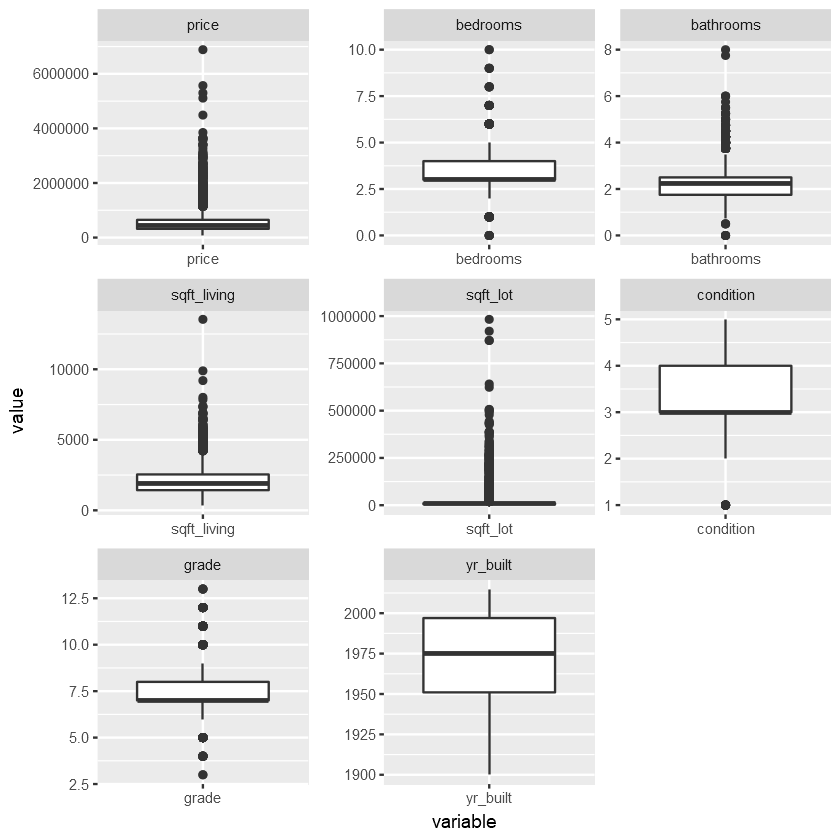

In [11]:
#reshape data for easy plotting
m1 <- melt(as.data.frame(train[,c(-6,-10)]))

#PLot boxplots
ggplot(m1,aes(x = variable,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

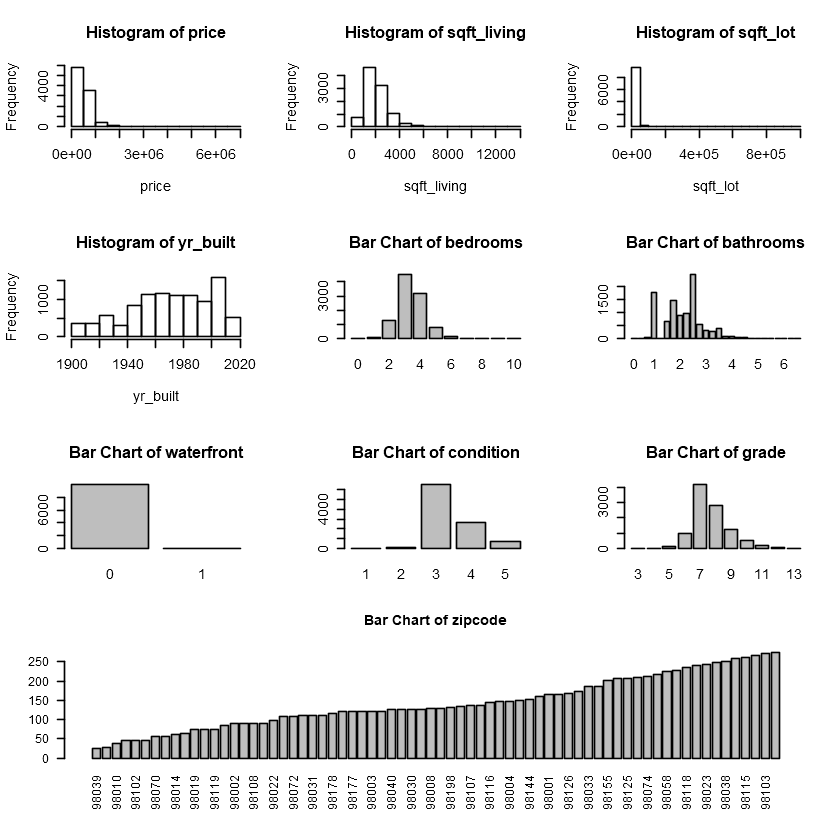

In [14]:
# Plot a histogram or bar chart of each variable
par(mfrow = c(4,3))
hist(price)
hist(sqft_living)
hist(sqft_lot)
hist(yr_built)
plot(as.factor(bedrooms),main="Bar Chart of bedrooms") 
plot(as.factor(bathrooms),main="Bar Chart of bathrooms")
plot(as.factor(waterfront), main="Bar Chart of waterfront")
plot(as.factor(condition), main="Bar Chart of condition")
plot(as.factor(grade), main="Bar Chart of grade")

# plot zipcode on a separate row
par(fig=c(0,1,0,0.30),ps=10,new=TRUE)
barplot(sort(table(zipcode)),las=2,main="Bar Chart of zipcode")

These graphs show:
- Price, sqft_living and sqft_lot all have large positive skews
- Most houses have 2.5 bathrooms, other common values are 1 and 1.75.
- There are very few waterfront properties
- Most properties have condition of 3 or 4
- Most properties have grade of 7 or 8
- Few properties built between 1900 and 1940, fairly even spread from 1940 to 2000, an increase in properties built between 2000 and 2010
- The numbers of properties sold by zip code varies from about 25 to about 250

Next, we investigate some standout features, like `price`, `sqft_living`, `sqft_log` using a log scale to see if these variables have a log-normal distribution

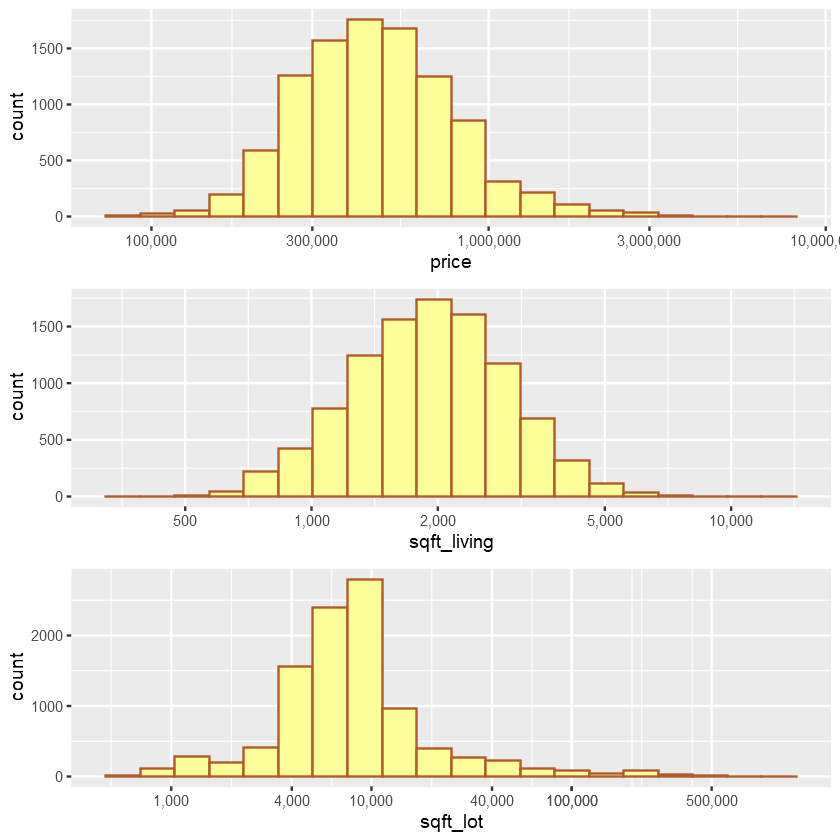

In [16]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# Re-plot some of the charts using log scales to counteract the skew
p1 <- ggplot(aes(x=price), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(100000,300000,1000000,3000000,10000000)) 
p2 <- ggplot(aes(x=sqft_living), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(500,1000,2000,5000,10000))
p3 <- ggplot(aes(x=sqft_lot), data=train) +
      geom_histogram(bins=20, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma,breaks=c(1000,4000,10000,40000,100000,500000,100000))
grid.arrange(p1, p2, p3, ncol=1, nrow=3)

These graphs show:
- The log of price and sqft_living are (nearly) normally distributed.
- The log of the sqft_lot is not quite normal. The majority of lot sizes are between 4000 and 10,000 sqft, with a few outliers > 100,000 sqft

There was a drop in sales of houses built during the 1930's and an increase in sales of houses built during the 2000's. The following graphs provide a closer look at sales for these years.

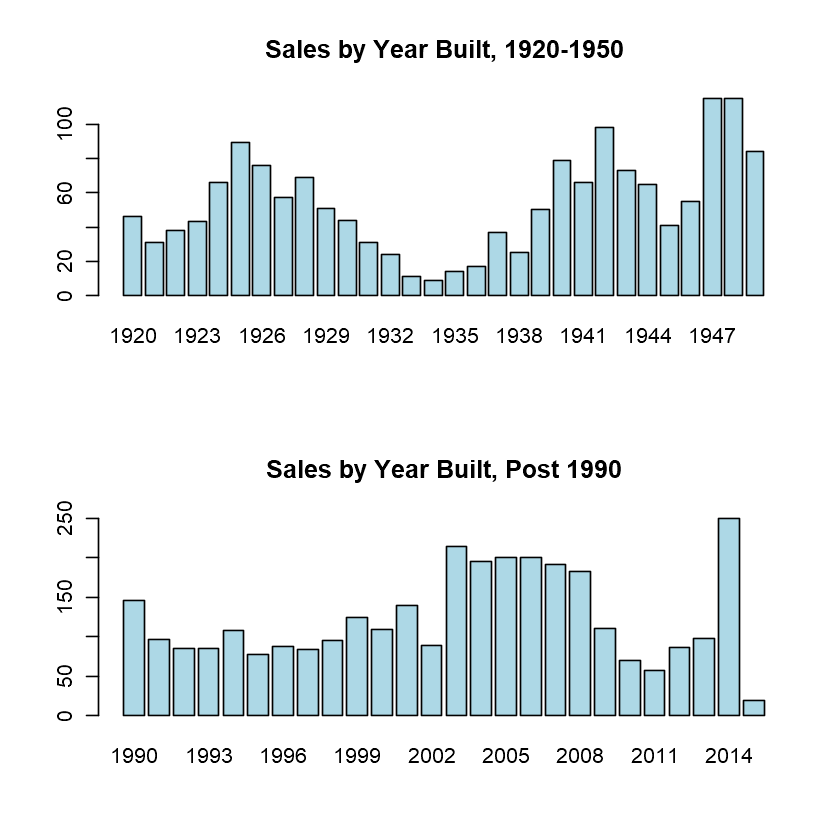

In [17]:
par(mfrow=c(2,1))
plot(as.factor(yr_built[yr_built >= 1920 & yr_built < 1950]),
     main = "Sales by Year Built, 1920-1950", col="lightblue")
plot(as.factor(yr_built[yr_built >= 1990]),
     main = "Sales by Year Built, Post 1990", col="lightblue")

There were very few houses sold that were built between 1933 and 1936 - these were depression years so maybe fewer houses were built. Then there was an increase in sales for houses built during WWII (so this data is probably not for a European city) and a spike during the post-war years of 1947 and 1948.

There was a jump in the number of houses sold that were built in 2003 to 2008. These houses were between six and twelve years old when they were sold. Fewer houses built between 2009 and 2013 were sold. These figures indicate that owners of new homes tend to own the house for at least six years before reselling. The sales volume of houses built in 2014 and 2015 show that about 2.5% of sales were for new houses.

One possible anomaly in the data is that there are houses with no bedrooms and/or no bathrooms. Take a closer look at these records.

In [19]:
train[bedrooms == 0 | bathrooms == 0,]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
37,139950,0,0.00,844,4269,0,4,7,1913,98001
987,235000,0,0.00,1470,4800,0,3,7,1996,98065
1295,355000,0,0.00,2460,8049,0,3,8,1990,98031
3523,265000,0,0.75,384,213444,0,3,4,2003,98070
4110,380000,0,0.00,1470,979,0,3,8,2006,98133
7081,339950,0,2.50,2290,8319,0,3,8,1985,98042
8099,280000,1,0.00,600,24501,0,2,3,1950,98045


These looks very strange. The first record describes a house with no bedrooms and no bathrooms but is in above average condition and of average grade. Record 7081 describes a house with no bedrooms but 2.5 bathrooms, so would suit a very clean person who doesn't sleep! Most (if not all) of these are likely to contain erroneous data.

### 1.2 Multivariate Analysis <a class="anchor" id="1.2"></a>

Let's first take a look at scatterplot matrix

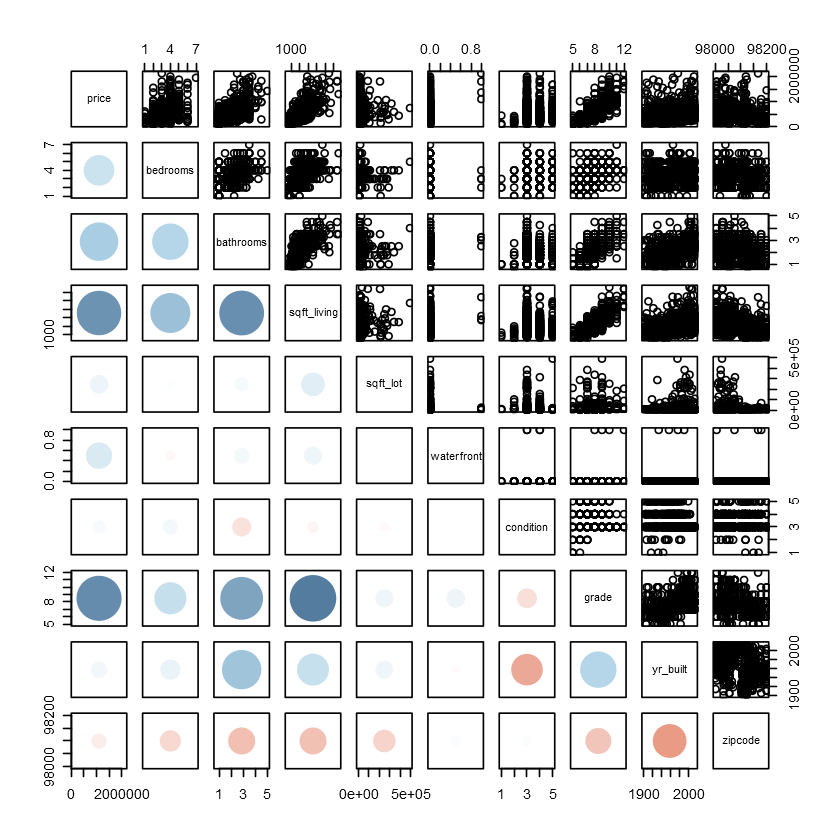

In [21]:
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

#Plot scatterplot matrix to visualize the correlations between variables
#Sample 1000 datapoints to prevent overcrowding the plot
pairs(train[sample.int(nrow(train),1000),], lower.panel=panel.cor)

Some notable points from the correlation matrix are:
- `Price` is strongly correlated to `sqft_living` and `grade`, has a weaker correlation to `bathrooms`, `bedrooms` and `waterfront`
- `Bedrooms`, `bathrooms`, `sqft_living`, `grade` and `yr_built` are all correlated to each other - in particular both `bathrooms` and `grade` are highly correlated to `sqft_living`
- There is quite a strong negative correlation between `condition` and `yr_built`
- There is very little correlation between the land size (`sqft_lot`) and `price`
- There is a correlation between `zipcode` and `yr_built`
- There is also a weak correlation between `price` and whether or not the property overlooks the waterfront (`waterfront`). 

Next, we examine how does looking at just these waterfront properties change the correlations?

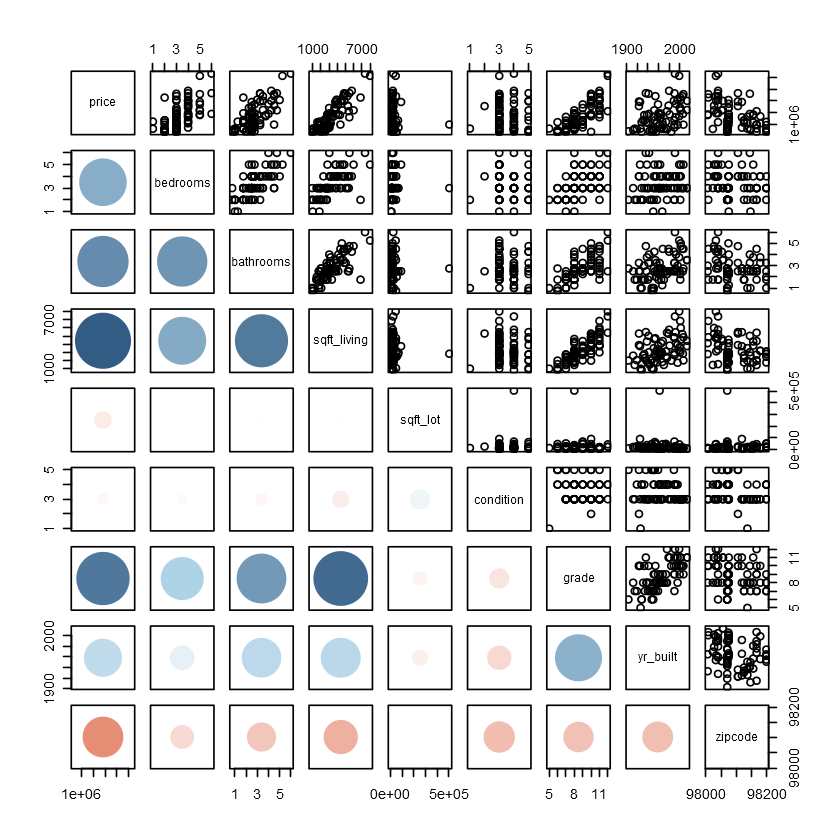

In [22]:
pairs(train[train$waterfront == 1,-6], lower.panel=panel.cor)

The correlations are similar but a few stronger ones:
- `yr_built` and `price`
- `bedrooms` with `bathrooms` and `grade`
- `grade` and `yr_built`
- The negative correlation between `condition` and `yr_built` is weaker
- There is a new correlation between `zipcode` and `price` - so the zipcode appears to have an effect on the price of waterfront properties, but not on other properties.

Next, we investigate correlations between price, bedrooms, bathrooms, sqft_living and grade

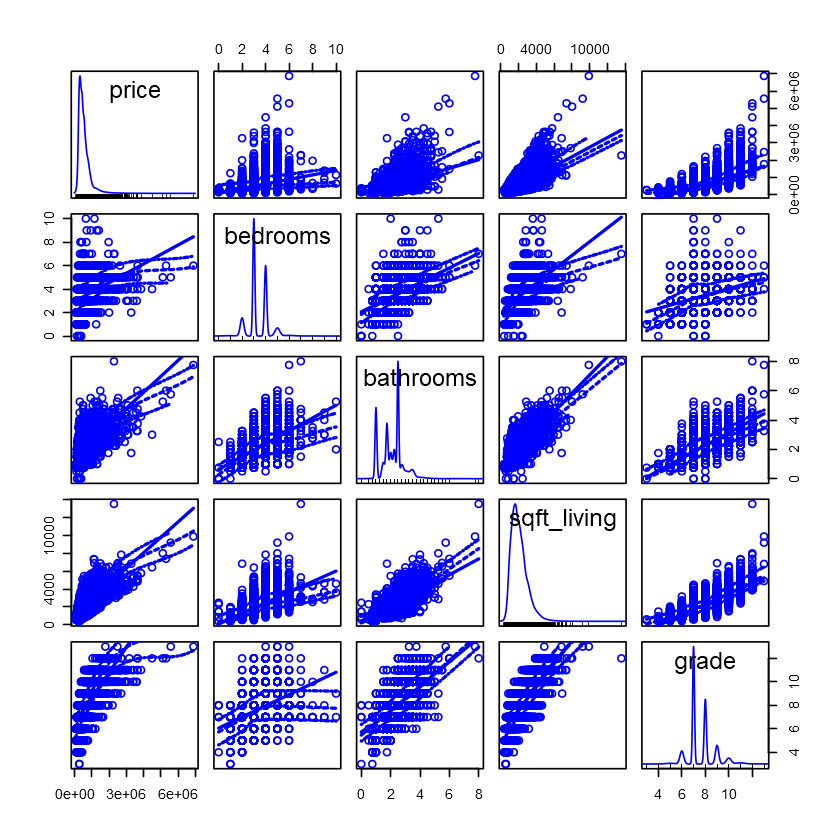

In [23]:
scatterplotMatrix(~price+bedrooms+bathrooms+sqft_living+grade,data=train)

The scatterplot matrix shows many of these relationships are non-linear - in particular the relationships between `price` and the other variables.

The relationship between `bedrooms` and the other variables looks to be linear for houses with between one and four bedrooms but changes for houses with more than four bedrooms.

In [24]:
#correlation coefficients
options(digit=4)
cor(train)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,zipcode
price,1.00000000,0.323447334,0.52504888,0.69585342,0.09395122,0.294854421,0.03339897,0.66882708,0.06104914,-0.04954038
bedrooms,0.32344733,1.000000000,0.52172634,0.59093850,0.03469110,-0.003382128,0.02869909,0.36706035,0.14510025,-0.14563153
bathrooms,0.52504888,0.521726344,1.00000000,0.75075993,0.08910870,0.075340484,-0.12710070,0.67009159,0.50991168,-0.19423624
sqft_living,0.69585342,0.590938504,0.75075993,1.00000000,0.18653177,0.119909534,-0.06341728,0.76514670,0.32163620,-0.19173193
sqft_lot,0.09395122,0.034691101,0.08910870,0.18653177,1.00000000,0.026781743,-0.01655929,0.11716693,0.05835844,-0.13529799
waterfront,0.29485442,-0.003382128,0.07534048,0.11990953,0.02678174,1.000000000,0.01523496,0.08539789,-0.01816067,0.02621444
condition,0.03339897,0.028699085,-0.12710070,-0.06341728,-0.01655929,0.015234959,1.00000000,-0.15030923,-0.36384516,0.01225731
grade,0.66882708,0.367060349,0.67009159,0.76514670,0.11716693,0.085397892,-0.15030923,1.00000000,0.45181948,-0.17988686
yr_built,0.06104914,0.145100252,0.50991168,0.32163620,0.05835844,-0.018160668,-0.36384516,0.45181948,1.00000000,-0.34942515
zipcode,-0.04954038,-0.145631531,-0.19423624,-0.19173193,-0.13529799,0.026214436,0.01225731,-0.17988686,-0.34942515,1.00000000


The top positive correlations are between:
- sqft_living and grade
- sqft_living and bathrooms
- sqft_living and price
- grade and bathrooms
- grade and price

The only significant negative correlation is between yr_built and condition - so older houses are generally in better condition than newer houses

#### Factorise categorical variables

In [26]:
train$waterfront <- as.factor(train$waterfront)
train$condition <- as.factor(train$condition)
train$grade <- as.factor(train$grade)
train$zipcode <- as.factor(train$zipcode)
str(train)

'data.frame':	10000 obs. of  10 variables:
 $ price      : int  211000 265000 1440000 800000 1059500 750000 229000 271115 428000 1240000 ...
 $ bedrooms   : int  4 3 3 4 5 2 3 2 3 4 ...
 $ bathrooms  : num  1 2.5 3.5 3.5 3.25 1 1.5 1.5 2.25 3.5 ...
 $ sqft_living: int  2100 1530 3870 2370 3230 1620 1200 830 2600 3820 ...
 $ sqft_lot   : int  9200 6000 3819 3302 3825 6120 5000 1325 15000 13224 ...
 $ waterfront : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ condition  : Factor w/ 5 levels "1","2","3","4",..: 3 4 3 3 3 3 3 3 3 3 ...
 $ grade      : Factor w/ 11 levels "3","4","5","6",..: 5 5 9 6 7 5 4 5 7 8 ...
 $ yr_built   : int  1959 1991 2002 1926 2014 1951 1979 2005 1978 1990 ...
 $ zipcode    : Factor w/ 70 levels "98001","98002",..: 65 24 42 43 52 50 61 59 24 4 ...


In [27]:
#Reshape for visualization and remove outliers
m1 <- melt(as.data.frame(train))
m1 <- m1[!(m1$variable == "sqft_living" & m1$value > 10000),]
m1 <- m1[!(m1$variable == "sqft_lot" & m1$value > 100000),]

Using waterfront, condition, grade, zipcode as id variables


#### Investigate `Grade` relationship with other variables

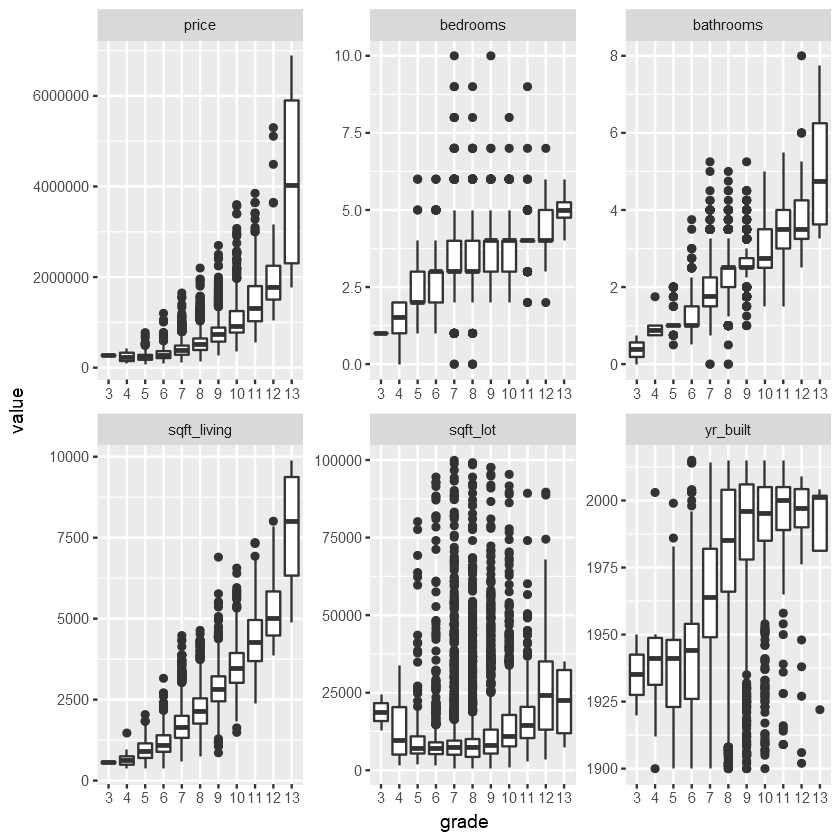

In [28]:
ggplot(m1,aes(x = grade,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

High grade houses:
- are higher priced than lower grade houses
- have more bedrooms and bathrooms
- are larger and on larger properties - but the lowest grade houses are also on larger properties
- tend to be newer houses

#### Investigate `Condition` relationship with other variables

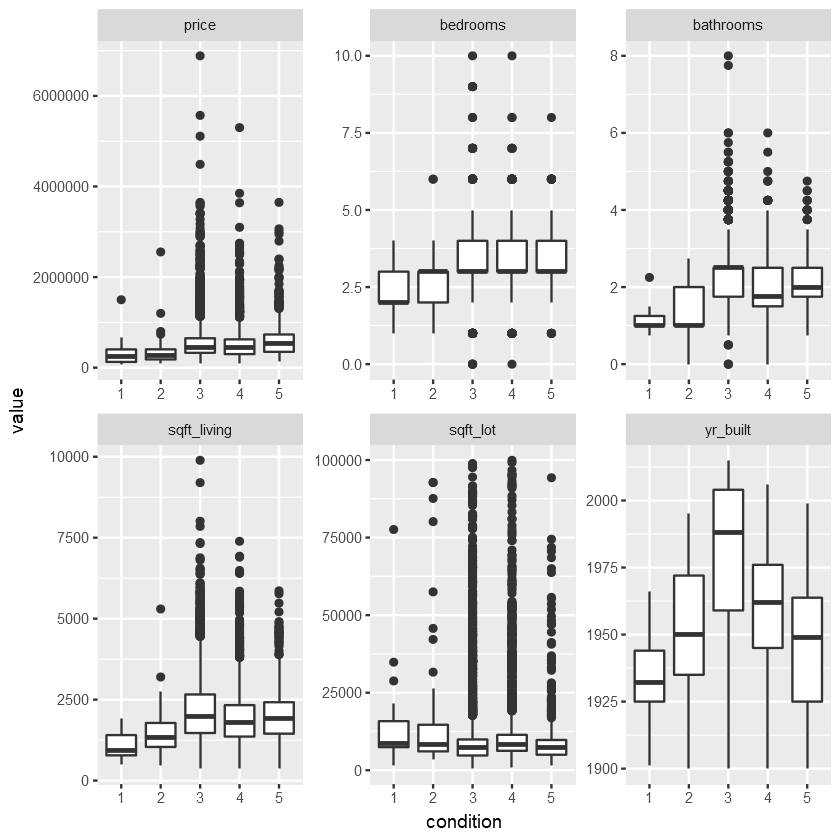

In [29]:
ggplot(m1,aes(x = condition,y = value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

Houses in the best condition are similar to houses in average condition, but tend to be older and so are probably older houses that have been renovated to a very high standard.

Houses in poor condition, compared to those in average condition:
- Sell for slightly less
- Have fewer bedrooms and bathrooms
- Are smaller but on similar sized properties
- Are older houses

#### Investigate `Zipcode` relationship with other variables

Show a boxplot of each numeric variable by zipcode. Zipcodes are coloured according to whether at least one property with the zipcode is a waterfront property (red - a waterfront zipcode, blue - not a waterfront zipcode). Outliers are not shown to reduce graph clutter.

Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."

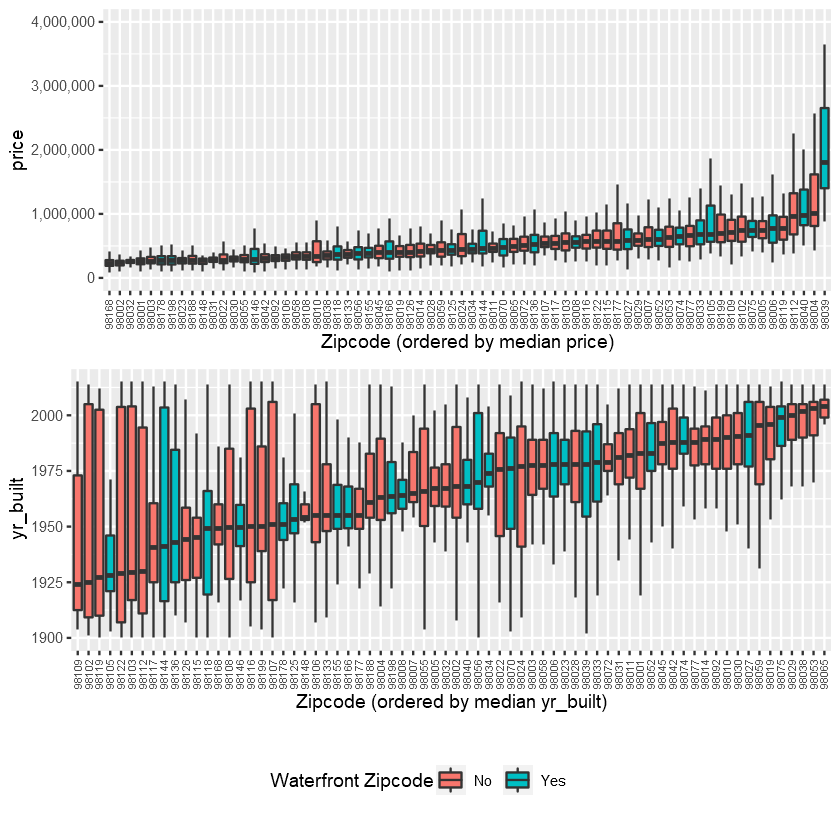

Warning message:
"Removed 8 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 214 rows containing non-finite values (stat_boxplot)."

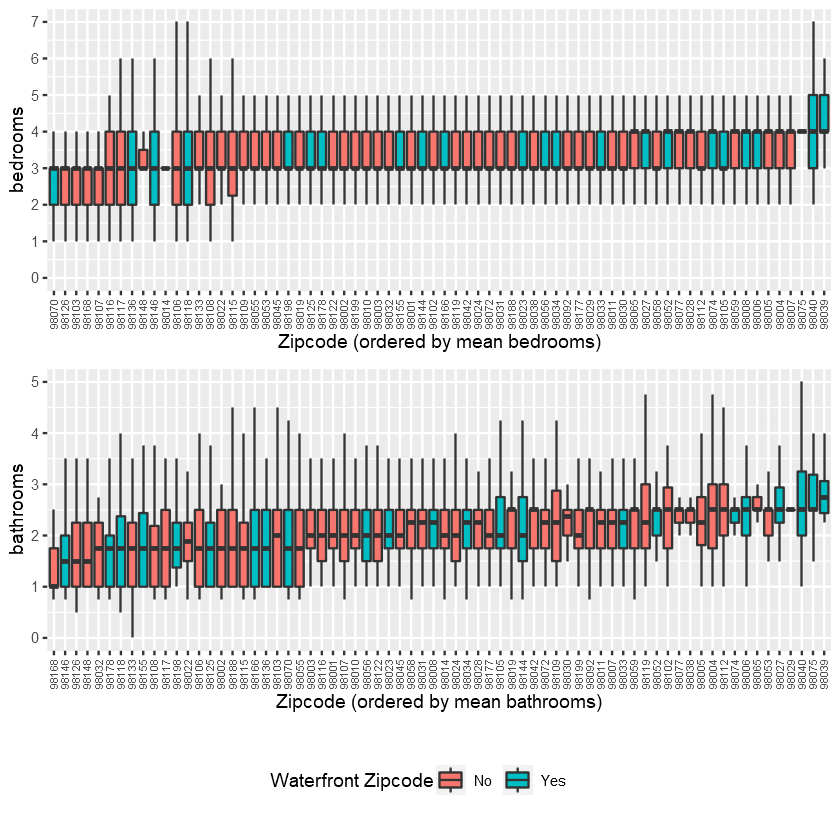

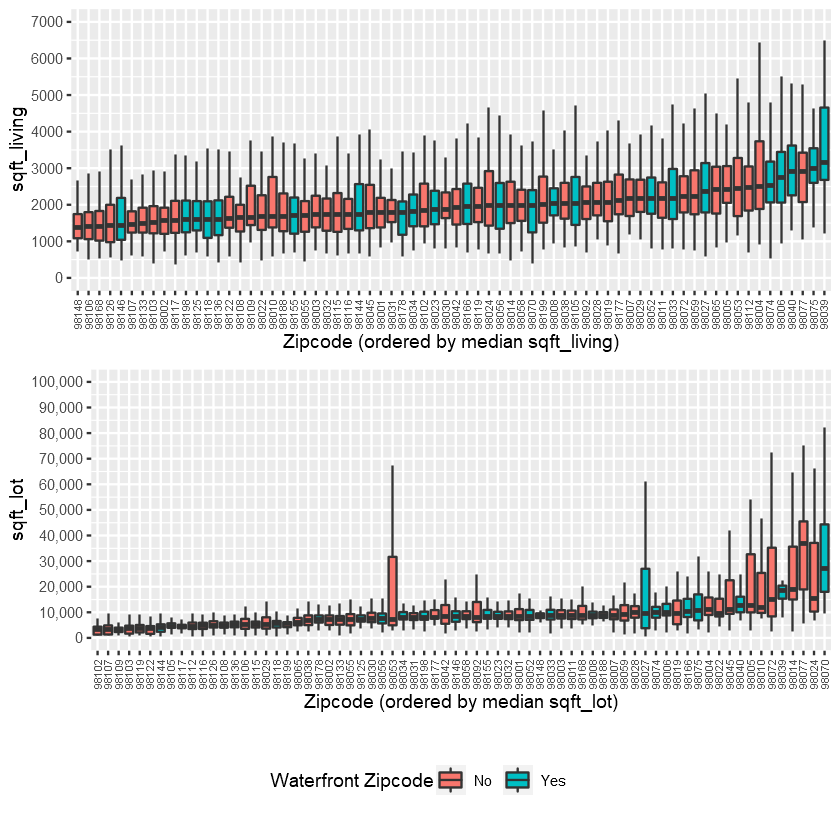

In [30]:
wf.zipcodes <- train$zipcode %in% unique(as.character(train$zipcode[waterfront==1]))

p1 <- ggplot(train,aes(x = reorder(zipcode,price,median),y = price)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,4000000), labels=comma) +
    scale_fill_discrete(name="Waterfront Zipcode", labels=c("No","Yes")) +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    xlab("Zipcode (ordered by median price)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

tmp <- ggplot_gtable(ggplot_build(p1))
leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
legend <- tmp$grobs[[leg]]

p2 <- ggplot(train,aes(x = reorder(zipcode,yr_built,median),y = yr_built)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median yr_built)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p1+theme(legend.position = 'none'), p2, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

p3 <- ggplot(train,aes(x = reorder(zipcode,bedrooms,mean),y = bedrooms)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,7),breaks=seq(0,7)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by mean bedrooms)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

p4 <- ggplot(train,aes(x = reorder(zipcode,bathrooms,mean),y = bathrooms)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,5),breaks=seq(0,5)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by mean bathrooms)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p3, p4, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

p5 <- ggplot(train,aes(x = reorder(zipcode,sqft_living,median),y = sqft_living)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,7000),breaks=seq(0,7000,1000)) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median sqft_living)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

p6 <- ggplot(train,aes(x = reorder(zipcode,sqft_lot,median),y = sqft_lot)) +
    geom_boxplot(outlier.shape=NA, mapping=aes(fill=wf.zipcodes)) +
    scale_y_continuous(limits=c(0,100000),breaks=seq(0,100000,10000), labels=comma) +
    scale_fill_discrete(guide="none") +
    xlab("Zipcode (ordered by median sqft_lot)") +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, size=6))

grid.arrange(p5, p6, legend, ncol=1, nrow=3, heights=c(3/7,3/7,1/7))

The above graphs show zipcodes are related to the other attributes in some interesting ways:
- There are a few high-priced zipcodes. The highest price zipcode contains waterfront properties.
- Quite a few zipcodes have predominately newer houses, a few have predominately "middle-aged" houses and a few have a range of older and newer houses.
- There is no real difference in number of bedrooms by zipcode
- Most zipcodes have mainly houses with more than one bathroom, but a few zipcodes have quite a few one bathroom houses (the lower hinge of the IQR is one).
- A few zipcodes have large houses and some very large properties
- Several of the zipcodes with larger houses have waterfront properties
- One zipcode (98039) stands out as having the highest prices, the most bedrooms and bathrooms and the largest houses. It has waterfront properties.

#### Waterfront Properties

The correlation matrices showed there are differences between how waterfront properties and non-waterfront properties are related to the other variables. These differences can be seen in the following charts.

Firstly, the differences of the numeric variable distributions between waterfront and non-waterfront properties are shown is the following density graphs.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 214 rows containing non-finite values (stat_density)."

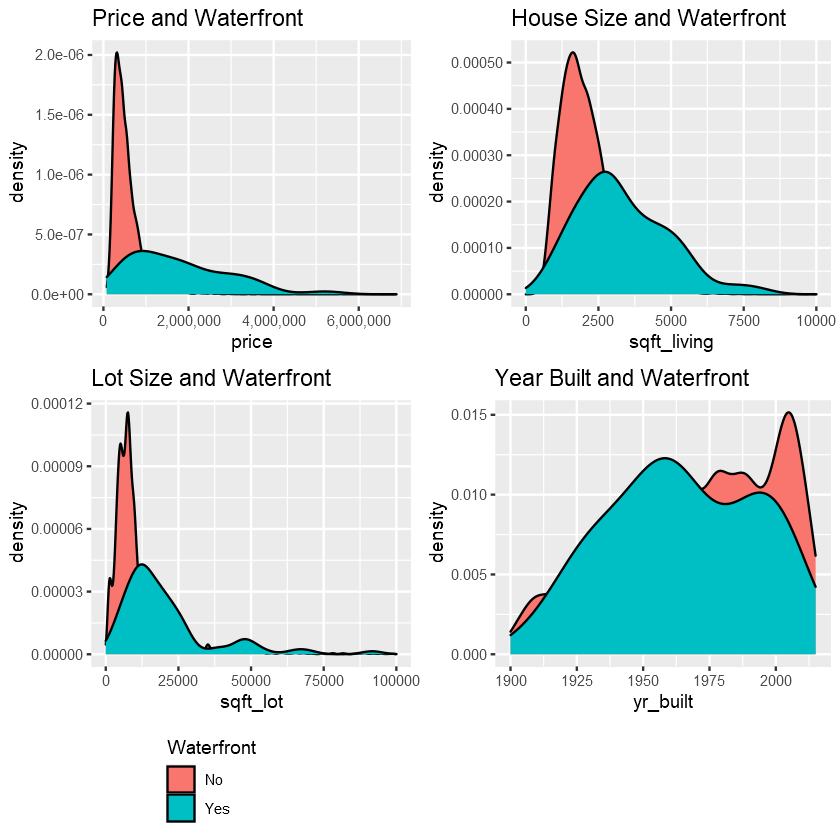

In [31]:
p1 <- ggplot(aes(x=price),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Price and Waterfront') +
    scale_x_continuous(labels=comma) +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p2 <- ggplot(aes(x=sqft_living),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('House Size and Waterfront') +
    scale_x_continuous(limits=c(0,10000)) +
    scale_y_continuous(labels=comma) +
    scale_fill_discrete(guide="none")

p3 <- ggplot(aes(x=sqft_lot),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Lot Size and Waterfront') +
    scale_x_continuous(limits=c(0,100000)) +
    scale_fill_discrete(guide="none")

p4 <- ggplot(aes(x=yr_built),data = train) + 
    geom_density(aes(fill = as.factor(waterfront))) +
    ggtitle('Year Built and Waterfront') +
    scale_fill_discrete(guide="none")

tmp <- ggplot_gtable(ggplot_build(p1))
leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
legend <- tmp$grobs[[leg]]

grid.arrange(p1+theme(legend.position = 'none'), p2, p3, p4, legend, ncol=2, nrow=3, heights=c(3/7,3/7,1/7))

Properties overlooking the waterfront have some quite different characteristics from other properties:
- They are more expensive than non-waterfront ones and have a wider price range
- They have a much wider range of both house size and plot size
- They are slightly older than non-waterfront ones

Next, we will investigate how waterfront properties differ from non-waterfront ones in terms of the number of bathrooms, condition and grade; and which zipcodes contain waterfront properties.

Warning message:
"Removed 2 rows containing non-finite values (stat_count)."Warning message:
"Removed 3 rows containing missing values (geom_bar)."

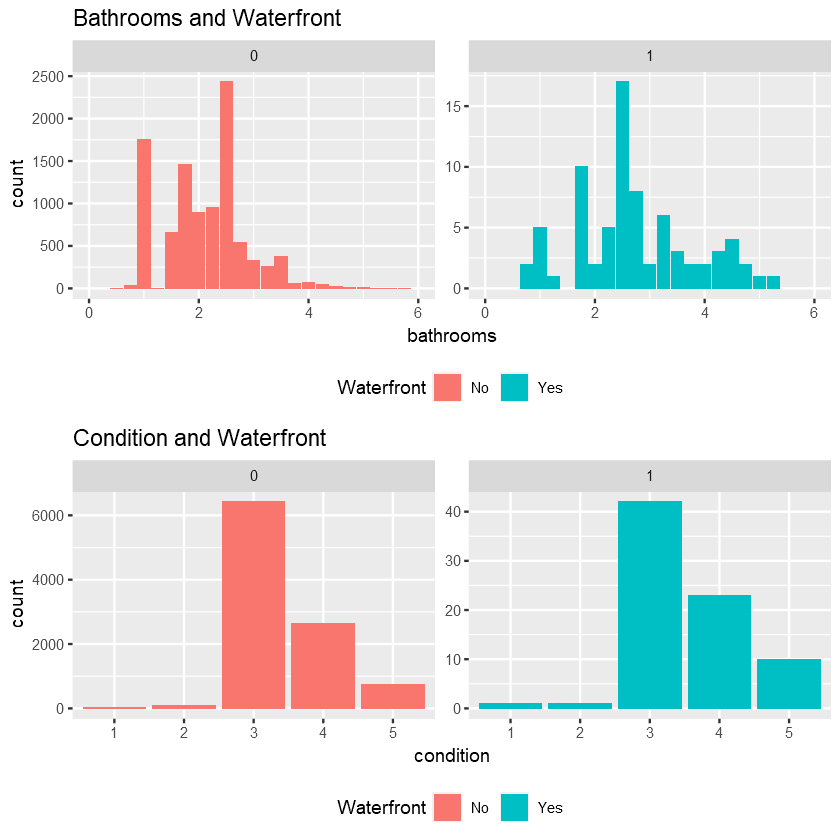

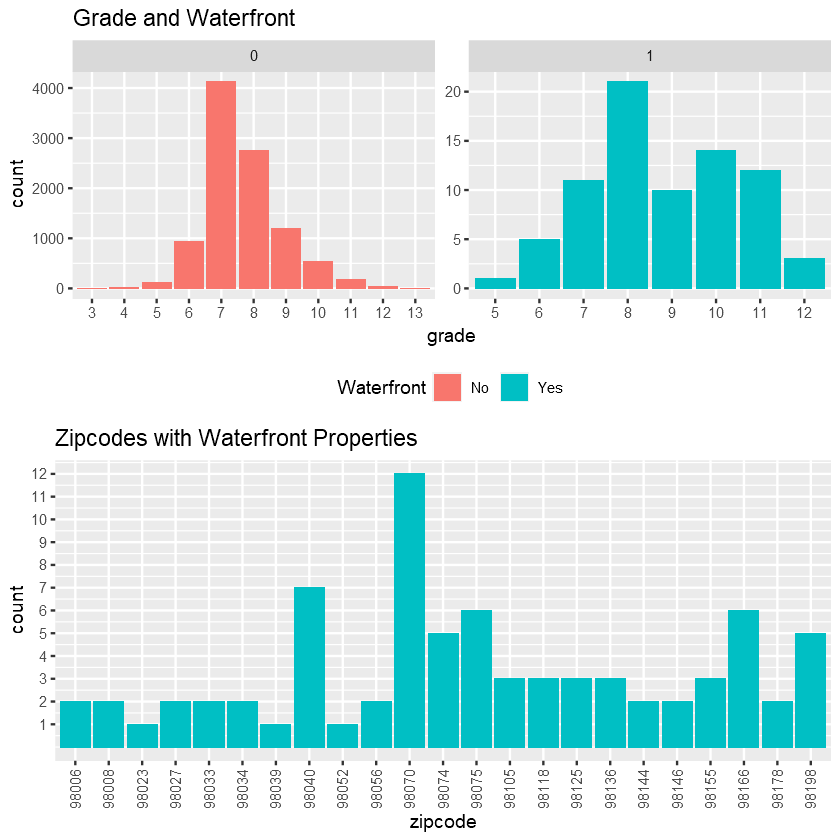

In [32]:
p1 <- ggplot(aes(x=bathrooms, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Bathrooms and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    scale_x_continuous(limits=c(0,6)) +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p2 <- ggplot(aes(x=condition, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Condition and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
    scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p3 <- ggplot(aes(x=grade, fill=waterfront),data = train) + 
    facet_wrap(~waterfront, scales="free") +
    geom_bar() +
    ggtitle('Grade and Waterfront') +
    theme(legend.position = "bottom", legend.box = "horizontal") +
   scale_fill_discrete(name="Waterfront", labels=c("No","Yes"))

p4 <- ggplot(aes(x=zipcode, fill=waterfront),data = train[train$waterfront == 1,]) +
   geom_bar(fill="#00BFC4") +
   ggtitle('Zipcodes with Waterfront Properties') +
   scale_y_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) +
   theme(axis.text.x = element_text(angle = 90, vjust=0.5))

grid.arrange(p1, p2, ncol=1, nrow=2)
grid.arrange(p3, p4, ncol=1, nrow=2)

Additional characteristics of waterfront properties compared to non-waterfront ones are:
- These houses have more bathrooms
- There are a higher proportion of houses in very good condition - but also in poor condition
- There are a higher proportion of high grade properties

The last plot shows that only 23 of the zipcodes had sales of waterfront properties and only six of these had more than three sales of waterfront properties.

#### How have House Features Changed over Time?

Look at the relationship between year built and bedrooms, bathrooms, grade and condition. Plot graphs using stacked barcharts showing proprotionality to see how these have changed over time. Years are grouped into decades to reduce the chart clutter.

Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message in Ops.factor(left, right):
"'>=' not meaningful for factors"Warning message:
"Removed 87728 rows containing non-finite values (stat_count)."Warning message:
"position_stack requires non-overlapping x intervals"Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
"

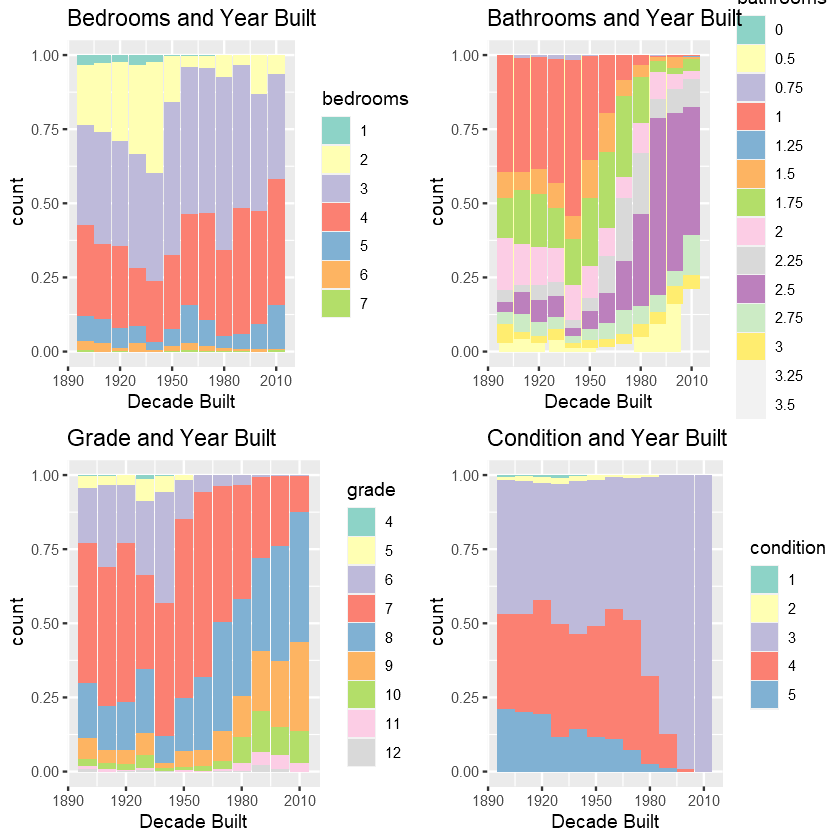

In [34]:
p1 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = as.factor(bedrooms)),data = train[bedrooms >= 1 & bedrooms < 8,]) +
    geom_bar(position="fill") +
    ggtitle('Bedrooms and Year Built') +
    scale_fill_brewer(palette="Set3",name="bedrooms") +
    xlab("Decade Built")

p2 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = as.factor(bathrooms)),data = train[train >= 1 & bathrooms <= 3.5,]) +
    geom_bar(position="fill") +
    ggtitle('Bathrooms and Year Built') +
    scale_fill_brewer(palette="Set3",name="bathrooms") +
    xlab("Decade Built")

p3 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = grade),data = train[grade >= 4 & grade < 13,]) +
    geom_bar(position="fill") +
    ggtitle('Grade and Year Built') +
    scale_fill_brewer(palette="Set3",name="grade") +
    xlab("Decade Built")

p4 <- ggplot(aes(x=(trunc((yr_built)/10))*10, fill = condition),data = train) +
    geom_bar(position="fill") +
    ggtitle('Condition and Year Built') +
    scale_fill_brewer(palette="Set3",name="condition") +
    xlab("Decade Built")

grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

These charts show:
- Two bedroom houses were common before the 1950's but are rare more recently, with three and four bedrooms becoming more common
- Most houses built before 1960 had only one bathroom, two and a half bathrooms is usual for recent houses
- Older houses tend to be of lower grade
- All the houses in poor condition tend to be older - but the houses in really good condition are also older. Most newer houses are in average condition

#### Association between Bedrooms, House Size and Price

The earlier scatterplot matrices show the relationship between bedrooms and house size, and bedrooms and price is different for houses with more than four bedrooms than for those with four or fewer bedrooms. Does plotting all three of these variables together show more about these relationships?

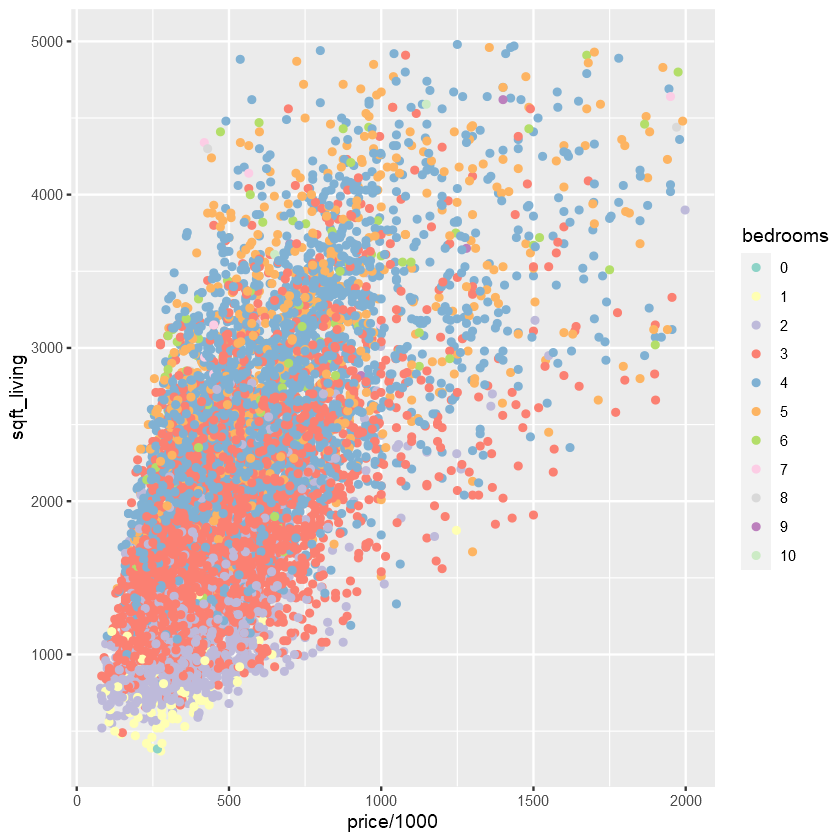

In [36]:
ggplot(aes(x=price/1000,y=sqft_living,colour=as.factor(bedrooms)),
             data = train[train$price < 2000000 & train$sqft_living < 5000,]) +
    geom_point() + 
    scale_colour_brewer(name="bedrooms",palette="Set3")

This plot shows that the number of bedrooms, the house size and the price increase together for houses between 1 and 4 bedrooms. Houses with more than 4 bedrooms look to be both have similar prices and be of similar size to 4 bedroom houses.

### Summary of EDA findings

The provided house sales data has 10000 records with 11 attributes for each record. The provided descriptions for each attribute and some additional notes are:

1. Id: Unique ID for each home sold
2. Price: Price of each home sold
3. Bedroom: #bedrooms
 - Values range from 0-10
4. Bathrooms: #bathrooms, where .5 accounts for a bathroom with a toilet but no shower
 - Values range from 0-8 and include .25 and .75, as well as .5
5. Sqft_living: Square footage of the apartments interior living space
6. Sqft_lot: Square footage of the land space
7. Waterfront: A binary variable indicating whether the property was overlooking the waterfront or not. 1’s represent a waterfront property, 0’s represent a non-waterfront property
8. Condition: An index from 1 to 5 on the condition of the apartment, 1 - lowest, 5 - highest
9. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.
 - Grades 1 and 2 are not present in the training data
10. Yr_built: The year the house was initially built.
 - Values range from 1900 to 2015
11. Zipcode: What postcode area the house is in

#### Univariate Analysis

Some houses appear to have been sold more than once during the year.

Price, sqft_living and sqft_lot have very skewed distributions. Plotting the log values of these variables shows a more normal distribution.

There were very few houses sold that were built between 1933 and 1936 - these were depression years so maybe fewer houses were built. Then there was an increase in sales for houses built during WWII and a spike during the post-war years of 1947 and 1948.

A spike in the sales of houses built between 2003 and 2008 was observed, probably indicating theat people who bought new homes then are now selling them. 

#### Multivariate Analysis

As might be expected, the sale price of a house appears to be determined by a range of factors including the size of the house, the number of bedrooms and bathrooms, the grade and the year the house was built. These variables are all inter-related with larger houses have more bedrooms and bathrooms; and the size, number of bedrooms and bathrooms all contributing to the grade. Two specific observations are:

- The size and grade of the house are the most highly correlated to the price are sqft_living and grade.

- The correlation between bedrooms and the other variables decreases for houses with more than four bedrooms.

What is a little surprising is that the condition of the house and the size of the lot do not appear to have a big effect on the price. A closer look at the condition showed that being in poor condition does lead to a lower price, but there are not many houses in poor condition. Being in better than average condition does not lead to a better price.

The condition and the age of the house are negatively correlated, implying that older houses are generally in better condition than newer houses. However the houses in the worst condition are also older houses. The majority of newer houses are in average condition.

There are several differences between properties that overlook the waterfront and other properties. Waterfront properties are usually higher-priced, larger, in better condition and higher grade houses, but as only 77 waterfront properties were sold some of these differences may not generalise to other sets of data.

An unexpected observation is that there appears to be a slight correlation between the number of bathrooms, whether or not the property overlooks the waterfront and the zipcode.

## 2. Model Building <a class="anchor" id="2"></a>